# Data Science Practice Problem

Company XYZ Human Resource department is trying to understand compensation across the company and asked you to pull data to help them make a decision regarding employee compensation.

Question: Can you pull the average, median, minimum, maximum, and standard deviations for salary across 5 year experience buckets at Company XYZ? (e.g. get the corresponding average, median, minimum, maximum, and standard deviations for experience buckets 0-5, 5-10, 10-15, etc.)

In [2]:
import pandas as pd
import numpy as np

# Creating the Data

In [3]:
# Define Random Values
years_employed = np.random.randint(0, 14, 500)

In [4]:
# Create DataFrame
df = pd.DataFrame({'Years_Experience': years_employed})

In [5]:
# Fill Compensation conditionality based on the value of Years Experience so that the Compensation is related to experience as expected
df['Compensation'] = np.where(df['Years_Experience'] < 5, np.random.randint(60000, 150000, len(df['Years_Experience'] < 5)), 0 )
df['Compensation'] = np.where(df['Years_Experience'] >= 5, np.random.randint(100000, 400000, len(df['Years_Experience'] >= 5)), df['Compensation'])
df['Compensation'] = np.where(df['Years_Experience'] >= 10, np.random.randint(170000, 4000000, len(df['Years_Experience'] >= 10)), df['Compensation'])

# Creating Information Stores

In [6]:
# Create Dict to Store Values
less_5 = {'Avg_Salary': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] < 5].mean()),
          'Min_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] < 5].min()),
          'Max_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] < 5].max()),
          'Std_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] < 5].std())}

In [7]:
# Create Dict to Store Values
five_to_ten = {'Avg_Salary': '${:,.2f}'.format(df['Compensation'][(df['Years_Experience'] < 10) & (df['Years_Experience'] >= 5)].mean()),
          'Min_Compensation': '${:,.2f}'.format(df['Compensation'][(df['Years_Experience'] < 10) & (df['Years_Experience'] >= 5)].min()),
          'Max_Compensation': '${:,.2f}'.format(df['Compensation'][(df['Years_Experience'] < 10) & (df['Years_Experience'] >= 5)].max()),
          'Std_Compensation': '${:,.2f}'.format(df['Compensation'][(df['Years_Experience'] < 10) & (df['Years_Experience'] >= 5)].std())}

In [8]:
# Create Dict to Store Values
ten_plus = {'Avg_Salary': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] >= 10].mean()),
          'Min_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] >= 10].min()),
          'Max_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] >= 10].max()),
          'Std_Compensation': '${:,.2f}'.format(df['Compensation'][df['Years_Experience'] < 10].std())}

# Reporting out the Information

In [9]:
# Report out the Average Salary
print('''The Average Salary for:
      - 5 or less years experience is: {}
      - 10 or less years experience is: {}
      - 10+ years experience is: {}'''.format(less_5['Avg_Salary'], five_to_ten['Avg_Salary'], ten_plus['Avg_Salary']))

The Average Salary for:
      - 5 or less years experience is: $101,954.09
      - 10 or less years experience is: $256,355.72
      - 10+ years experience is: $2,097,409.94


In [10]:
# Report out the Minimum Salary
print('''The Minimum Salary for:
      - 5 or less years experience is: {}
      - 10 or less years experience is: {}
      - 10+ years experience is: {}'''.format(less_5['Min_Compensation'], five_to_ten['Min_Compensation'], ten_plus['Min_Compensation']))

The Minimum Salary for:
      - 5 or less years experience is: $60,064.00
      - 10 or less years experience is: $102,817.00
      - 10+ years experience is: $205,384.00


In [11]:
# Report out the Maximum Salary
print('''The Maximum Salary for:
      - 5 or less years experience is: {}
      - 10 or less years experience is: {}
      - 10+ years experience is: {}'''.format(less_5['Max_Compensation'], five_to_ten['Max_Compensation'], ten_plus['Max_Compensation']))

The Maximum Salary for:
      - 5 or less years experience is: $148,796.00
      - 10 or less years experience is: $397,872.00
      - 10+ years experience is: $3,978,237.00


In [12]:
# Report out the Standard Deviation
print('''The Standard Deviation of Salary for:
      - 5 or less years experience is: {}
      - 10 or less years experience is: {}
      - 10+ years experience is: {}'''.format(less_5['Std_Compensation'], five_to_ten['Std_Compensation'], ten_plus['Std_Compensation']))

The Standard Deviation of Salary for:
      - 5 or less years experience is: $25,259.73
      - 10 or less years experience is: $84,383.69
      - 10+ years experience is: $98,545.31


# Visualizing the Information

In [13]:
import seaborn as sns
sns.set(style="darkgrid")

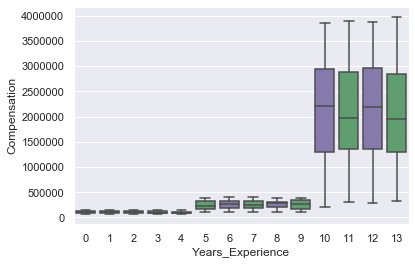

In [21]:
sns.boxplot(x="Years_Experience", y="Compensation", palette=["m", "g"], data=df)

In [17]:
df

,Years_Experience,Compensation
0,0,83664
1,1,97793
2,13,3978237
3,5,120097
4,6,192174
...,...,...
495,3,125729
496,2,122160
497,13,2688144
498,10,536549


In [22]:
# Group the Years_Experience to make visualization easier across the 3 bins
df['Group'] = np.where(df['Years_Experience'] < 5, 1, 0 )
df['Group'] = np.where(df['Years_Experience'] >= 5, 2, df['Group'])
df['Group'] = np.where(df['Years_Experience'] >= 10, 3, df['Group'])

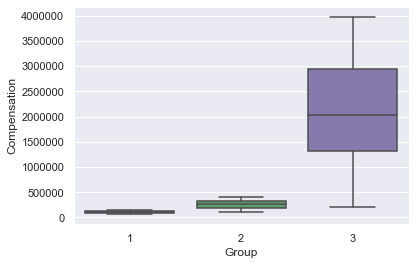

In [28]:
# How do the groups look compared to each other?
sns.boxplot(x="Group", y="Compensation", palette=["m", "g"], data=df)

In [26]:
# How much more, on average, do Group 3 employees make than Group 1 employees
df[df['Group'] == 3].Compensation.mean() / df[df['Group'] == 1].Compensation.mean()

20.57210203401297

In [27]:
df[df['Group'] == 3].Compensation.median() / df[df['Group'] == 1].Compensation.median()

20.60857139956549

## Business Conclusion: Our 10+ years experience employees are paid, on average, 20x more than our 0-5 years experience employees

### The Median gives  us a similar number because the numbers were pulled from a random, normal distribution